<a href="https://colab.research.google.com/github/dipsankar-sinha/Bengali_Hate_Speech_Detection-ML/blob/master/Bengali_Hate_speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mounting Google Drive to Colab Notebook to access the files on the drive and save the model in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
#installing nessecary library from pip
!pip install nltk
!pip install bangla-stemmer

In [4]:
cd /content/drive/MyDrive/Bengali_Hate_Speech_Detection

/content/drive/MyDrive/Bengali_Hate_Speech_Detection



#Dataset Description
- We are using three datasets 2 from Kaggle and 1 from UCI Machine Learning Repository
- Kaggle DataSet 1: https://www.kaggle.com/datasets/naurosromim/bengali-hate-speech-dataset
- Kaggle Dataset 2: https://www.kaggle.com/datasets/naurosromim/bdshs
- UCI Dataset: https://archive.ics.uci.edu/dataset/719/bengali+hate+speech+detection+dataset
- UCI Full Dataset in GitHub Repository Link: https://github.com/rezacsedu/Bengali-Hate-Speech-Dataset


In [5]:
#Data preprocessing of the Kaggle Data: 1
import pandas as pd
kaggle_data = pd.read_csv('Kaggle/bn_hate_speech.csv')

In [6]:
kaggle_data.head()

,sentence,hate,category
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports


In [7]:
# Count the number of samples for each hate label in the  dataset
class_counts = kaggle_data['hate'].value_counts()
print("Data Size for Each Hate Label:")
print(class_counts)

Data Size for Each Hate Label:
hate
0    20000
1    10000
Name: count, dtype: int64


In [8]:
#No need to worry about the category
#We, are focusing on wheather it is hate speech or not
#Dropping the category attribute
kaggle_data = kaggle_data.drop('category', axis=1)

In [10]:
kaggle_data.head()

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1


In [11]:
print("Shape of the data", kaggle_data.shape)

Shape of the data (30000, 2)


In [12]:
#Deleting of duplicates
kaggle_data.drop_duplicates(inplace=True)

In [13]:
print("Shape of the data", kaggle_data.shape)

Shape of the data (29864, 2)


In [14]:
#Now we will work with UCI data
#We have collected all datasets from GitHub Repository and UCI ML Repository

import pandas as pd

bH0 = pd.concat([pd.read_csv('UCI/train.csv'), pd.read_csv('UCI/validate.csv'), pd.read_csv('UCI/test.csv')], ignore_index=True)
bH1= pd.read_csv('UCI/hate_data1.csv')
bH2=pd.read_csv('UCI/hate_data2.csv')

In [15]:
bH0.head()

,text,label
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical


In [16]:
bH1.head()

,text,label
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical
4,পাকিস্তান আমার বাল,Geopolitical


In [17]:
bH2.head()

,text,label
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal


In [18]:
print("Shapes of the data:\n",bH0.shape,"\n",bH1.shape,"\n",bH2.shape)

Shapes of the data:
 (4500, 2) 
 (3418, 2) 
 (5698, 2)


In [19]:
#deleting duplicate data
bH0.drop_duplicates(inplace=True)
bH1.drop_duplicates(inplace=True)
bH2.drop_duplicates(inplace=True)

In [20]:
#Combining all the files
UCI_data = pd.concat([bH0,bH1,bH2], ignore_index=True)

In [21]:
UCI_data.drop_duplicates(inplace=True)
UCI_data.reset_index(drop=True, inplace=True)

In [22]:
UCI_data.head()

,text,label
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical


In [23]:
print("Shape Of The UCI Data", UCI_data.shape)

Shape Of The UCI Data (12679, 2)


In [24]:
#Class Distributation
class_counts = UCI_data["label"].value_counts()
print("Class Distribution:\n",class_counts)

Class Distribution:
 label
Personal          3984
Geopolitical      3363
Neutral           1986
Religious         1621
Political         1409
Gender abusive     316
Name: count, dtype: int64


In [25]:
#Here, only neutral statements are not hate speech
# Neutral -> marking as 0
# Rest are marked as 1
UCI_data["hate"] = UCI_data["label"].apply(lambda x: 0 if x == "Neutral" else 1)

In [26]:
#Class Distributation for hate
class_counts = UCI_data["hate"].value_counts()
print("Class Distribution:\n",class_counts)

Class Distribution:
 hate
1    10693
0     1986
Name: count, dtype: int64


In [27]:
#Droping the label column
UCI_data = UCI_data.drop('label', axis=1)

In [28]:
UCI_data.head()

,text,hate
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,1
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,1
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",1
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,1
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,1


In [29]:
#Renaming text to sentence to adhere similarity among all the datasets
UCI_data.rename(columns={"text" : "sentence"},inplace=True)

In [30]:
#Dropping duplicates
UCI_data.drop_duplicates(inplace=True)

In [31]:
print("Final Shape of the UCI data is: ", UCI_data.shape)

Final Shape of the UCI data is:  (12516, 2)


In [32]:
#Now using another kagle data->BD-SHS
import pandas as pd
kaggle_bd = pd.concat([pd.read_csv('Kaggle-BD_SHS/train.csv'), pd.read_csv('Kaggle-BD_SHS/test.csv'), pd.read_csv('Kaggle-BD_SHS/val.csv')], ignore_index=True)

In [33]:
kaggle_bd.head()

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1


In [34]:
#target and type are not required so, removing them
kaggle_bd.drop(['target','type'], axis=1, inplace=True)

In [35]:
kaggle_bd.drop_duplicates(inplace=True)

In [36]:
print("The Shape of the Kaggle-BD data is", kaggle_bd.shape)

The Shape of the Kaggle-BD data is (50277, 2)


In [37]:
kaggle_bd.head()

,sentence,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1
4,২য় মীর জাফরের মুখে মুতে দে...,1


In [38]:
kaggle_bd.rename(columns={'hate speech':'hate'}, inplace=True)

In [39]:
kaggle_bd.head()

,sentence,hate
0,.... ঐ ইন্দুর তোই মরছ নাই?,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1
4,২য় মীর জাফরের মুখে মুতে দে...,1


#Data Preprocessing
- Mega Dataset has been created
- Now, applying diffrent methods to clean the datset.
- And, also representing the satistical components of the data
- Cleaning Methods include: Removing Emojies, special charecters, stop words, forign language words, numbers and bengali numbers
- Used a stemmer (bangla stemmer) to convert the bengali words to its root form

In [40]:
#Creating The Mega DataSet by combining the kaggle data (2 types)and UCI data
data = pd.concat([kaggle_data,UCI_data, kaggle_bd],ignore_index=True)
#data= kaggle_data.copy()

In [41]:
#removing null, duplicates and resetting indices
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [42]:
print("The shape of the combined data:",data.shape)

The shape of the combined data: (74194, 2)


In [43]:
#Class Distributation for hate
no_classes = data["hate"].value_counts()
print("Class Distribution:\n",no_classes)

Class Distribution:
 hate
0    38569
1    35625
Name: count, dtype: int64


In [44]:
%%capture
#Cleaning and Normalising the data
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from bangla_stemmer.stemmer.stemmer import BanglaStemmer

nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer for Bengali

stop_words = set(stopwords.words('bengali'))
stemmer = BanglaStemmer()

# Regex pattern to keep Bengali characters and whitespace
chars_to_ignore_regex = r'[^\u0980-\u09FF\s]'

def clean_text(batch):
    # Normalize Unicode and remove unwanted characters
    batch["sentence"] = batch["sentence"].apply(lambda text: unicodedata.normalize('NFKD', text))
    batch["sentence"] = batch["sentence"].apply(lambda text: re.sub(chars_to_ignore_regex, '', text))
    batch["sentence"] = batch["sentence"].apply(lambda text: re.sub(r'[\u09E6-\u09EF]', '', text))  # Remove Bengali numbers
    batch["sentence"] = batch["sentence"].str.lower()  # Convert to lowercase

    # Remove stop words
    batch["sentence"] = batch["sentence"].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

    # Apply stemming
    batch["sentence"] = batch["sentence"].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

    # Remove extra whitespaces
    batch["sentence"] = batch["sentence"].apply(lambda text: re.sub(r'\s+', ' ', text).strip())

    return batch


# Clean the data
data = clean_text(data)

In [45]:
import re
import nltk

def transform_text(text):
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        i = re.sub(r'\W+', '', i)
        if i:
            y.append(i)

    return " ".join(y)
data['transformed_text'] = data['sentence'].apply(transform_text)

In [85]:
#If a string is empty in sentence attribute delting those rows
data = data[data['sentence'] != '']
data.reset_index(drop=True, inplace=True)

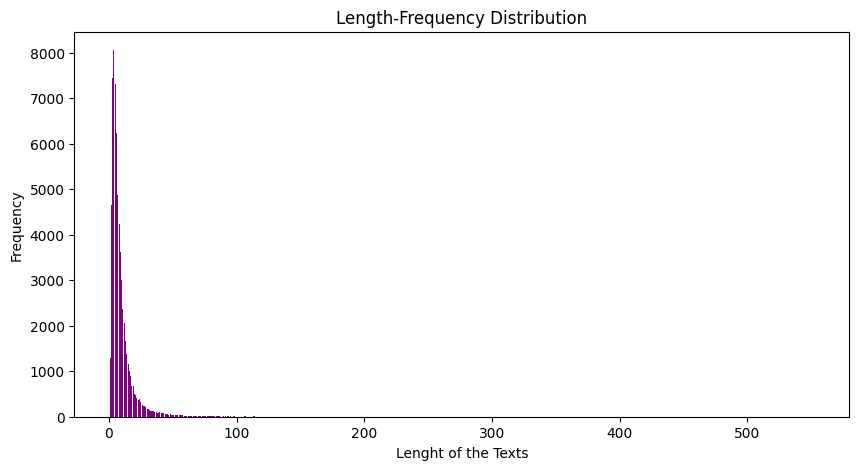

Maximum Length of a sentence: 552
Minimum Length of a sentence: 1
Average Length of a sentence: 10.0


In [94]:
import matplotlib.pyplot as plt
import numpy as np
#Calculate the Review of each of the Review
data['SentenceLength'] = data.sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.SentenceLength:
    frequency[i] = frequency.get(i, 0)+1
plt.figure(figsize=(10,5))
plt.bar(frequency.keys(), frequency.values(), color ="purple")

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.savefig("Length_Frequency.png")
plt.show()
print(f"Maximum Length of a sentence: {max(data.SentenceLength)}")
print(f"Minimum Length of a sentence: {min(data.SentenceLength)}")
print(f"Average Length of a sentence: {round(np.mean(data.SentenceLength),0)}")

In [95]:
data.head()

,sentence,hate,transformed_text,ReviewLength,SentenceLength
0,যত্তসব পাপন শালা ফাজলামী,1,যততসব পপন শল ফজলম,4,4
1,পাপন শালা রে রিমান্ডে দরক,1,পপন শল র রমনড দরক,5,5
2,জিল্লুর রহমান স্যার ছাল এতো বড় জারজ এক দেশের...,1,জললর রহমন সযর ছল এত বড জরজ এক দশর মনষ কন ভব পর...,15,15
3,শালা লুচ্চা পাঠা মত,1,শল লচচ পঠ মত,4,4
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1,তই ত শল গজ খইছচতর মর হডয খলব সকব,9,9


In [96]:
data.drop_duplicates(inplace=True)

In [97]:
#Now The data Distributition
class_counts = data['hate'].value_counts()
print("Data Size for Each Hate Label:")
print(class_counts)

Data Size for Each Hate Label:
hate
0    36910
1    31943
Name: count, dtype: int64


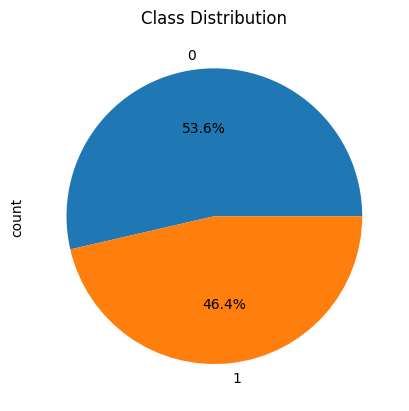

In [98]:
import matplotlib.pyplot as plt
value_counts = data['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Class Distribution")

# Show the plot
plt.savefig("UnBalanced_Dataset.png")
plt.show()

In [99]:
# identify the class with the least samples
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()
# calculate the number of samples required to balance the classes
upsample_size = class_counts[max_class] - class_counts[min_class]
print(upsample_size)
## applying upsampling.
# upsample the minority class to balance the classes
# It samples the data from the data frame with replacement, meaning that it can choose the same sample multiple times.
data_minority_upsampled = data[data['hate'] == min_class].sample(n=upsample_size, replace=True, random_state=42)
data_upsampled = pd.concat([data, data_minority_upsampled])
# shuffle the samples in the balanced dataset
data_upsampled = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
# save the balanced dataset to a file

4967


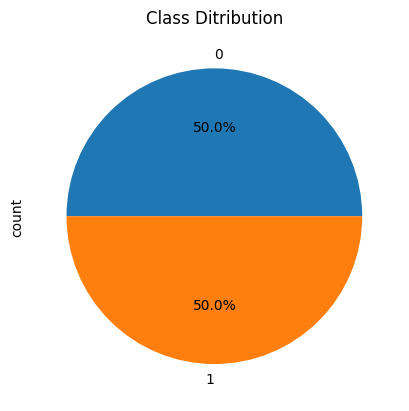

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = data_upsampled['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Class Ditribution")

# Show the plot
plt.savefig("Balanced_Dataset.png")
plt.show()


In [101]:
data_upsampled = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [102]:
#Creating Train Test Split of the data
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_upsampled, test_size=0.2, random_state=42)

In [103]:
train_data.head()

,sentence,hate,transformed_text,ReviewLength,SentenceLength
3461,এসো সবা মিলে মিন্নির চুদা জাক,1,এস সব মল মননর চদ জক,6,6
13734,আসলে শালা বদমাইস এক অরিজিনাল কাউয়া সত্যি কথা বল,1,আসল শল বদমইস এক অরজনল কউয সতয কথ বল,9,9
38209,ভালো লাগ লাইক দিল,0,ভল লগ লইক দল,4,4
12687,শাহনাজ খুশি চঞ্চল মায় চরিত্রে ভালো মানাবে,0,শহনজ খশ চঞচল ময চরতর ভল মনব,7,7
4811,মুদি তুই চা আলা এরকম ভাবনা আস,0,মদ তই চ আল এরকম ভবন আস,7,7


In [104]:
test_data.head()

,sentence,hate,transformed_text,ReviewLength,SentenceLength
50585,সবা ছবির শ্যুটিং দেখত,0,সব ছবর শযট দখত,4,4
21738,আমির হামজা একজন সত্যি খাঠি আলেম,0,আমর হমজ একজন সতয খঠ আলম,6,6
6329,বিল পাশ করানে দরক,0,বল পশ করন দরক,4,4
37859,কাফের সাথে কথা নিজে ছোট দরক,1,কফর সথ কথ নজ ছট দরক,6,6
35542,জিবনে কখনো সিনেমা সিনেমা দেখিনিতা গত বছরে খাল...,0,জবন কখন সনম সনম দখনত গত বছর খলত ভইয দদবড মঠবডয...,42,42


In [105]:
#Class Distribution for train and test dataset
train_data_label_counts = train_data['hate'].value_counts()
test_data_label_counts = test_data['hate'].value_counts()
print("Train Data Size for Each category Label:")
print(train_data_label_counts)
print()
print("Test Data Size for Each category Label:")
print(test_data_label_counts)

Train Data Size for Each category Label:
hate
1    29551
0    29505
Name: count, dtype: int64

Test Data Size for Each category Label:
hate
0    7405
1    7359
Name: count, dtype: int64


# Feature Extraction

In this section, we perform feature extraction using the `TfidfVectorizer` from `scikit-learn`. TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert the text data into numerical features, allowing machine learning algorithms to process and learn from the text.

### Key Steps:
- We have used **TfidfVectorizer** for feature extraction.
- The vectorizer converts the text into a matrix of TF-IDF features, where each word is assigned a weight based on its frequency in the document and across the entire corpus.
- We used **unigrams**, **bigrams**, and **trigrams** (n-grams) to capture various combinations of words, allowing the model to understand different levels of context.
- Only terms that appear in at least **2 documents** are considered, filtering out very rare words.



In [106]:
#Feature Extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction with N-grams (Unigrams, Bigrams, and Trigrams)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)  # Using unigrams, bigrams, and trigrams
X_train = vectorizer.fit_transform(train_data['transformed_text']).toarray()
X_test = vectorizer.transform(test_data['transformed_text']).toarray()

Y_train = train_data['hate']
Y_test = test_data['hate']

In [122]:
#Dumping the vectorizer for future use
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

#Model Training & Evaluation

### Models used:
- **Logistic Regression**
- **Random Forest**
- **Gradient Boosting**
- **Support Vector Machine (SVM)**

### Metrics Evaluated
- **Accuracy**: Proportion of correctly predicted instances.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Proportion of true positive predictions among all actual positives.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Matrix showing the true positives, false positives, true negatives, and false negatives.

### Prerequisites

Libraries installed:
- `scikit-learn`
- `seaborn`
- `matplotlib`
- `numpy`
- `pickle`


Classifier: Logistic Regression
Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1 Score: 0.81
Classification Report:
              precision    recall  f1-score   support

     No Hate       0.79      0.86      0.82      7405
        Hate       0.85      0.76      0.80      7359

    accuracy                           0.81     14764
   macro avg       0.82      0.81      0.81     14764
weighted avg       0.82      0.81      0.81     14764



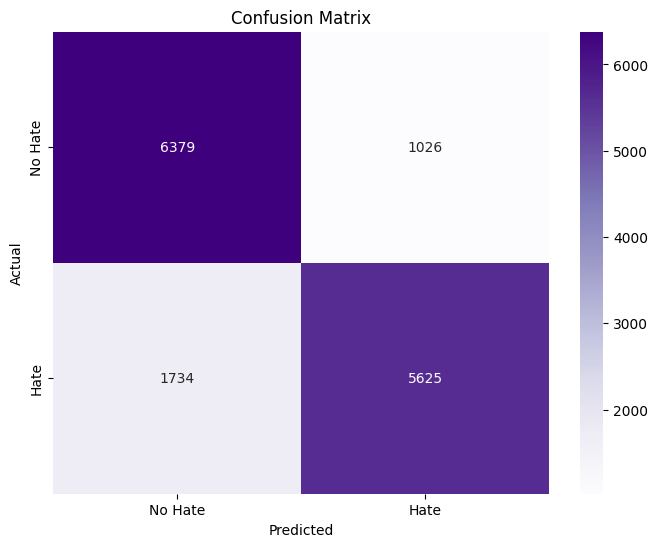

-------------------------------------------------------------

Classifier: Random Forest
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Classification Report:
              precision    recall  f1-score   support

     No Hate       0.81      0.81      0.81      7405
        Hate       0.81      0.81      0.81      7359

    accuracy                           0.81     14764
   macro avg       0.81      0.81      0.81     14764
weighted avg       0.81      0.81      0.81     14764



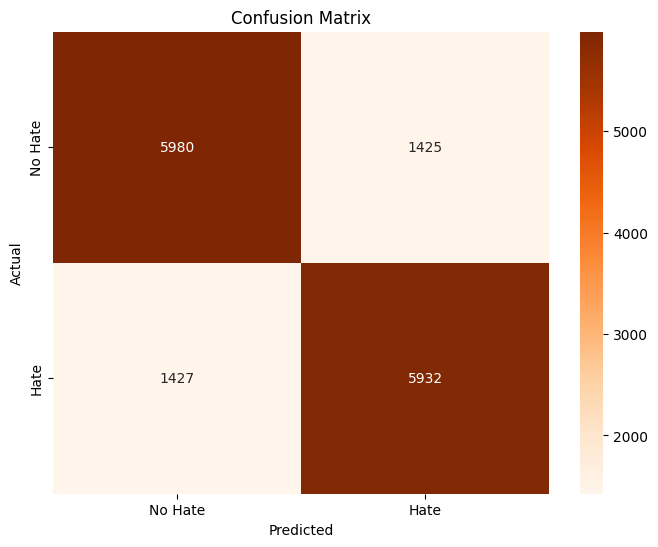

-------------------------------------------------------------

Classifier: Gradient Boosting
Accuracy: 0.75
Precision: 0.78
Recall: 0.75
F1 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

     No Hate       0.70      0.90      0.79      7405
        Hate       0.86      0.61      0.71      7359

    accuracy                           0.75     14764
   macro avg       0.78      0.75      0.75     14764
weighted avg       0.78      0.75      0.75     14764



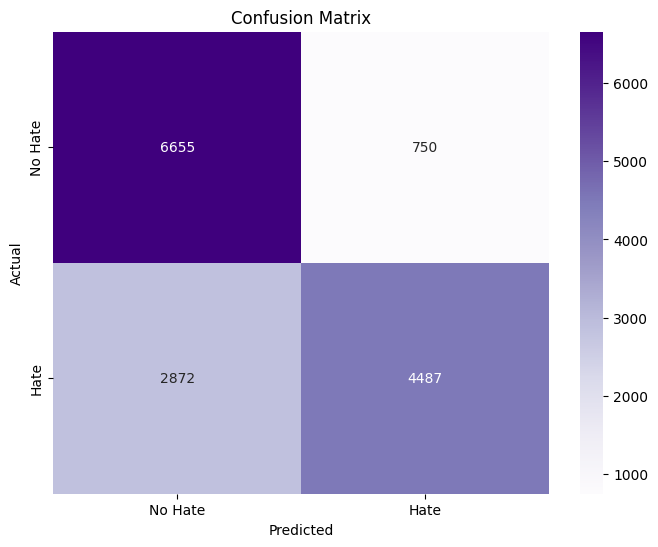

-------------------------------------------------------------

Classifier: SVM
Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1 Score: 0.81
Classification Report:
              precision    recall  f1-score   support

     No Hate       0.79      0.86      0.82      7405
        Hate       0.84      0.77      0.81      7359

    accuracy                           0.81     14764
   macro avg       0.82      0.81      0.81     14764
weighted avg       0.82      0.81      0.81     14764



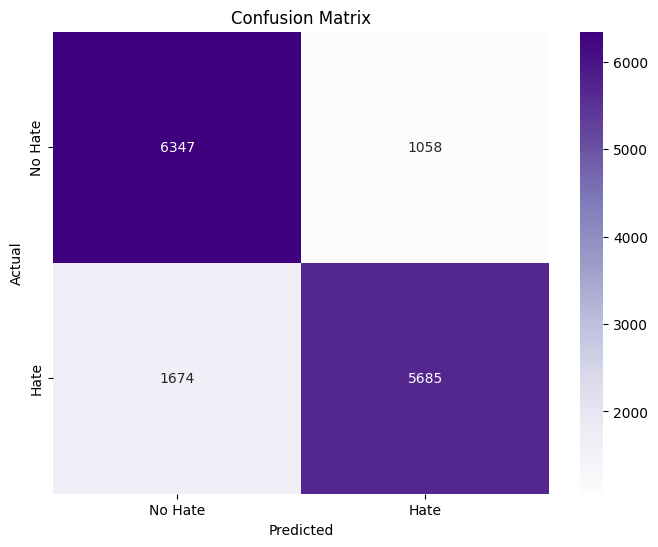

-------------------------------------------------------------



In [115]:
#Calculating the acuuracy, confusion_matrix, classification Report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(kernel='linear')
}
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)

    # Save the trained model to a file
    with open(f'Model/{classifier_name}_model.pkl', 'wb') as file:
        pickle.dump(classifier, file)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, target_names=["No Hate", "Hate"])
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    print(f"Classifier: {classifier_name}")
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("Classification Report:")
    print(report)
    #Creating a colorful Confusion matrix
    plt.figure(figsize=(8, 6))
    cmap = np.random.choice(np.array(["Blues", "Reds", "Greens", "Purples", "Oranges"]))
    sns.heatmap(confusion, annot=True, fmt='d', cmap=cmap,
                xticklabels=["No Hate", "Hate"],
                yticklabels=["No Hate", "Hate"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.savefig(f"{classifier_name}_confusion_matrix.png")

    plt.show()



    print("-------------------------------------------------------------")
    print()

In [116]:
train_data.to_csv('final_train_data.csv', index=False)
test_data.to_csv('final_test_data.csv', index=False)

In [117]:
loaded_model = pickle.load(open('Model/Logistic Regression_model.pkl', 'rb'))

In [120]:
y_pred = loaded_model.predict(X_test)